<a href="https://colab.research.google.com/github/RifatMuhtasim/Machine_Learning/blob/main/K_Means_Clustering/KMeans_Clustering_Kneed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
X, _ = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)
X.shape

(1000, 2)

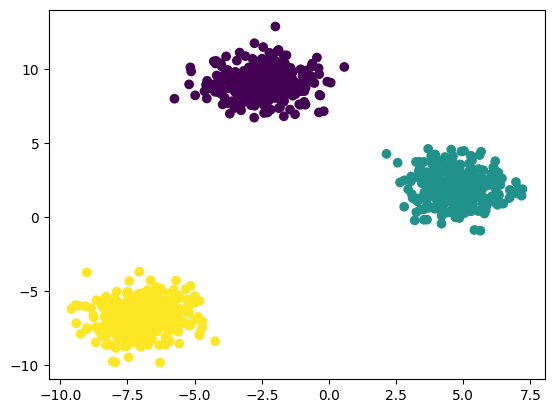

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=_)
plt.show()

# Elbow Point

In [4]:
def Elbow_point(start, last, X):
    wcss = []
    for k in range(start, last):
        kmeans = KMeans(n_clusters=k, init="k-means++")
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    plt.plot(range(start, last), wcss)
    plt.xticks(range(start, last))
    plt.xlabel("Number of Cluster")
    plt.ylabel("WCSS")
    plt.show()

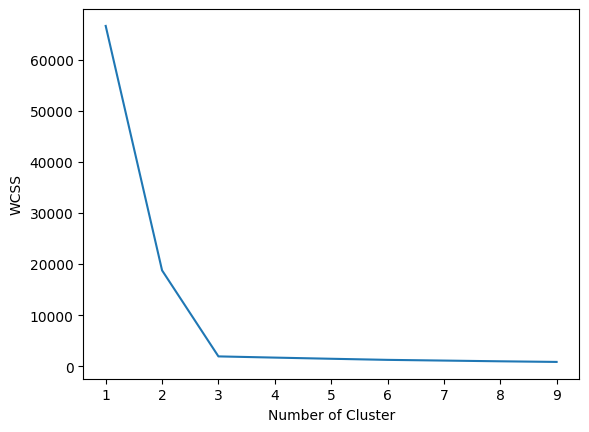

In [5]:
Elbow_point(1, 10, X)

# KNEE Locator

In [6]:
!pip install kneed
from kneed import KneeLocator

def Kneed(start, last, X):
    wcss = []
    for k in range(start, last):
        kmeans_cluster = KMeans(n_clusters=k, init="k-means++")
        kmeans_cluster.fit(X)
        wcss.append(kmeans_cluster.inertia_)

    kl = KneeLocator(range(start, last), wcss, curve="convex", direction="decreasing")
    print("Clusters:", kl.elbow)

In [7]:
Kneed(1, 10, X)

Clusters: 3


# KMeans

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init="k-means++")
y_labels = kmeans.fit_predict(X)

# Performance Metrics
##### Silhouette Score

Pick the highest Number of value

In [9]:
from sklearn.metrics import silhouette_score

def Silhouette_score(start, last, X):
    silhouette_coefficients = []
    for k in range(start, last):
        kmeans = KMeans(n_clusters=k, init="k-means++")
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        silhouette_coefficients.append(score)

    plt.plot(range(start, last), silhouette_coefficients)
    plt.xticks(range(start, last))
    plt.xlabel("Number of Cluster")
    plt.ylabel("Silhoutte Coefficient")
    plt.show()

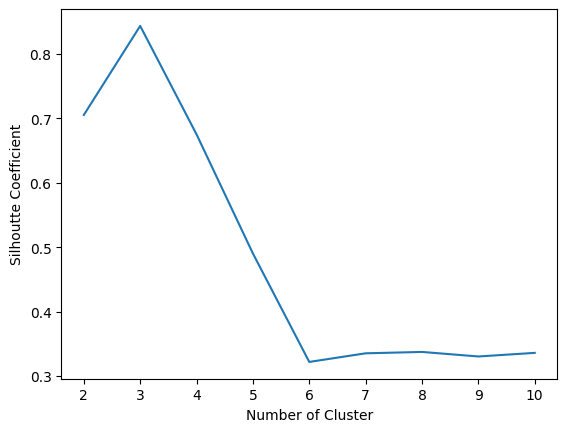

In [10]:
Silhouette_score(2, 11, X)